# Homework - Module 1

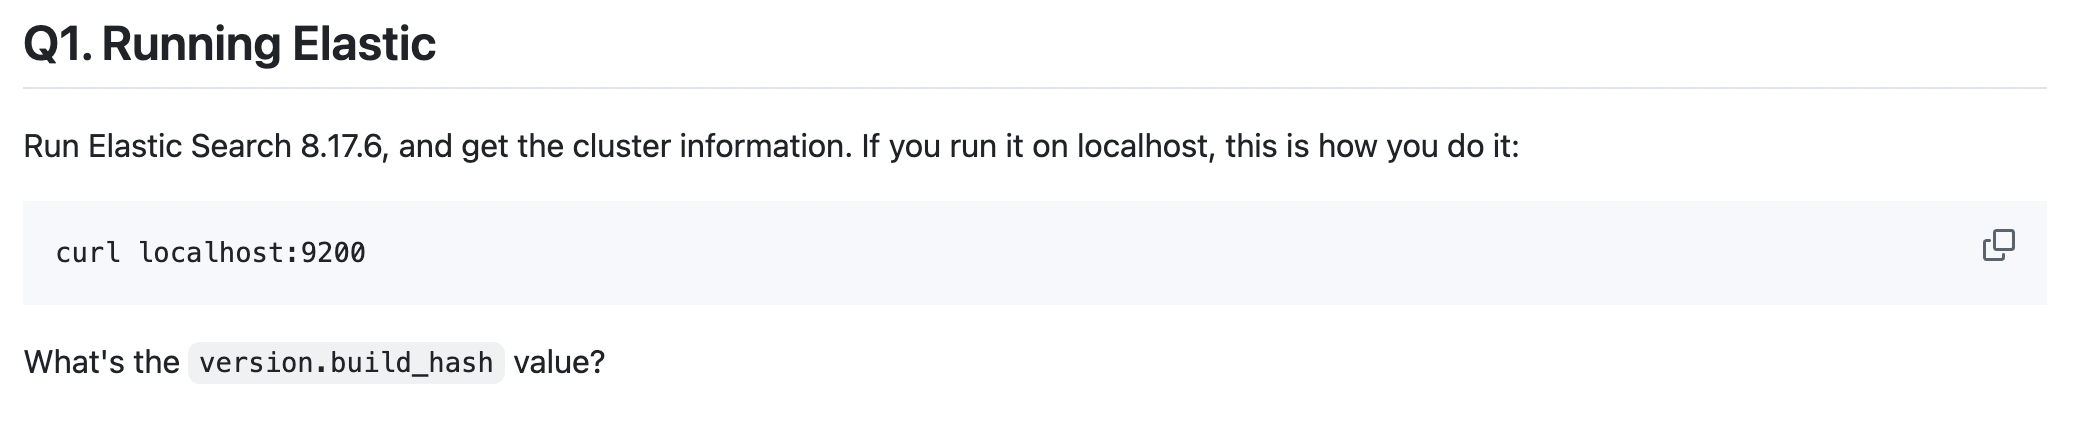

In [1]:
!curl localhost:9200

{
  "name" : "628c37060246",
  "cluster_name" : "docker-cluster",
  "cluster_uuid" : "uhL8fz6vRcmsRJgIZ4b9Lg",
  "version" : {
    "number" : "8.4.3",
    "build_flavor" : "default",
    "build_type" : "docker",
    "build_hash" : "42f05b9372a9a4a470db3b52817899b99a76ee73",
    "build_date" : "2022-10-04T07:17:24.662462378Z",
    "build_snapshot" : false,
    "lucene_version" : "9.3.0",
    "minimum_wire_compatibility_version" : "7.17.0",
    "minimum_index_compatibility_version" : "7.0.0"
  },
  "tagline" : "You Know, for Search"
}


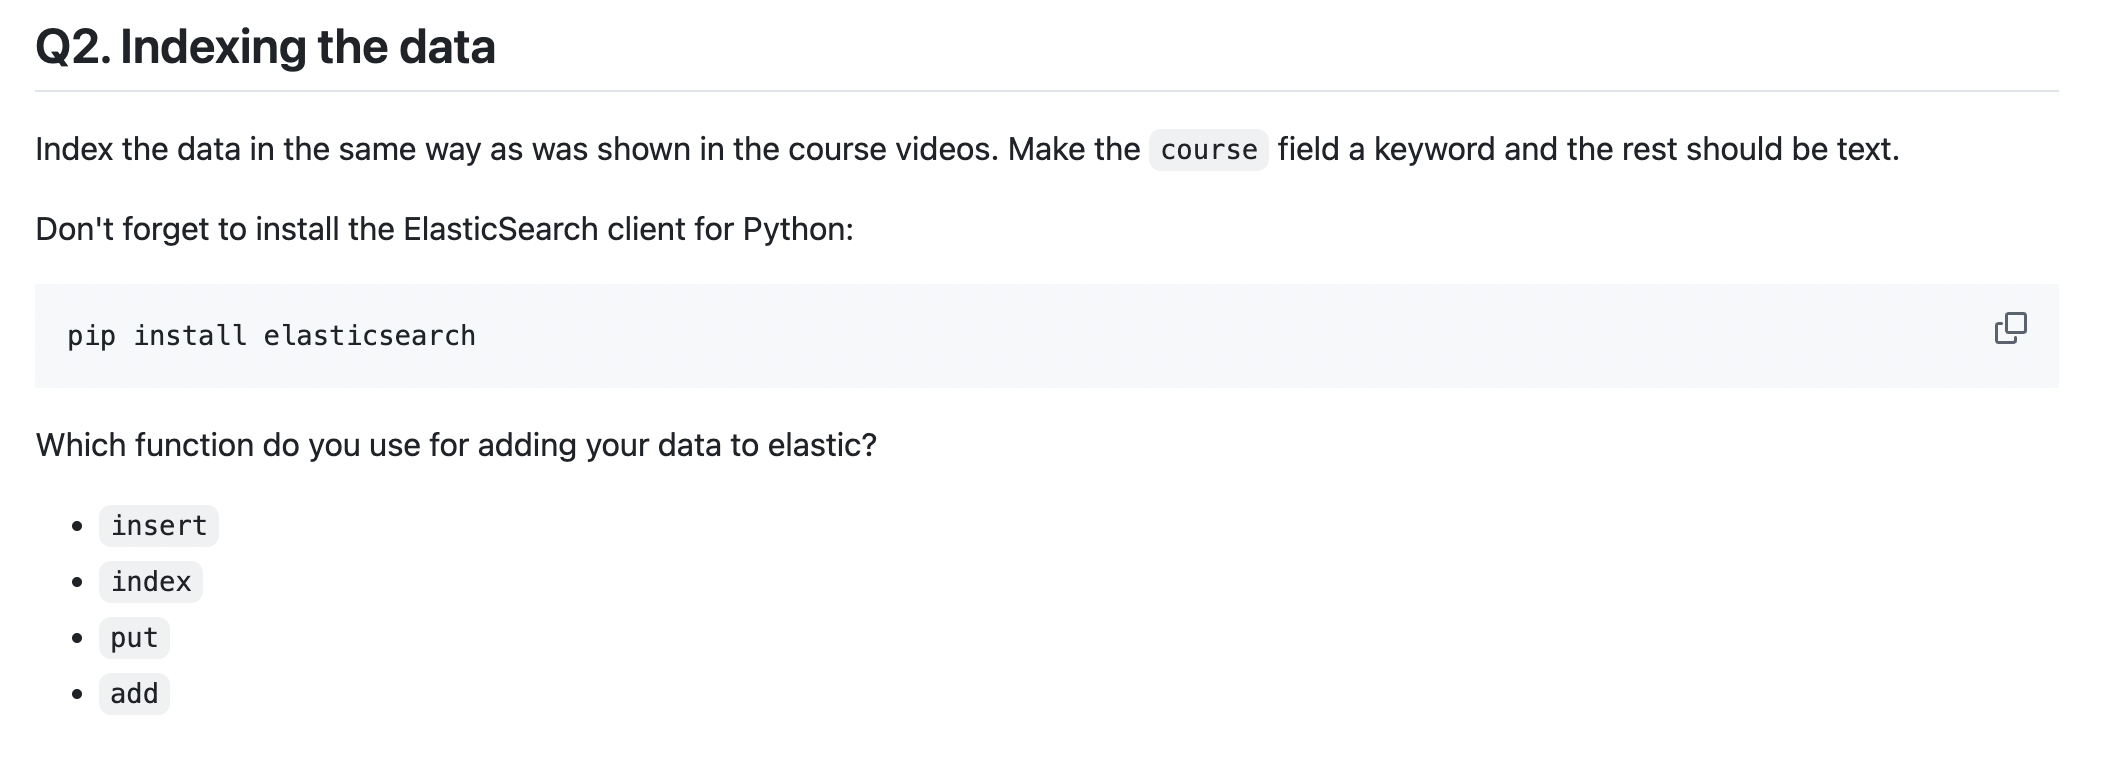

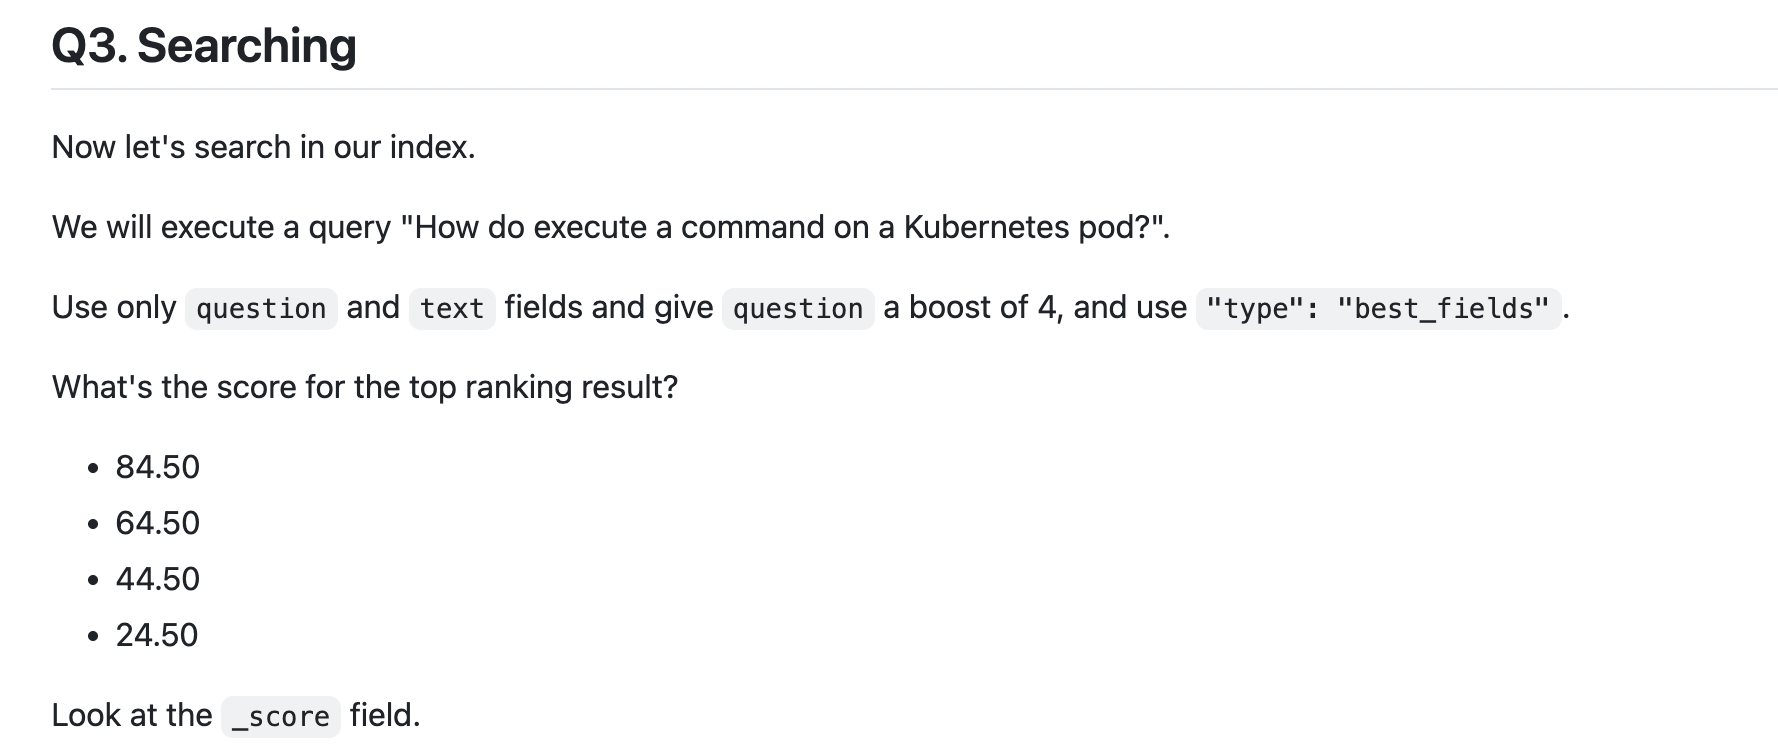

In [6]:
from elasticsearch import Elasticsearch

es_client = Elasticsearch("http://localhost:9200")


INDEX_NAME = "course-questions"
TEST_QUERY = "How do execute a command on a Kubernetes pod?"

search_query = {
            "size": 10,
            "query": {
                "bool": {
                    "must": {
                        "multi_match": {
                            "query": TEST_QUERY,
                            "fields": ["question^4", "text"],
                            "type": "best_fields"
                        }
                    },

                }
            }
}
    
response = es_client.search(index=INDEX_NAME, body=search_query)
response.body["hits"]["max_score"]

44.34057

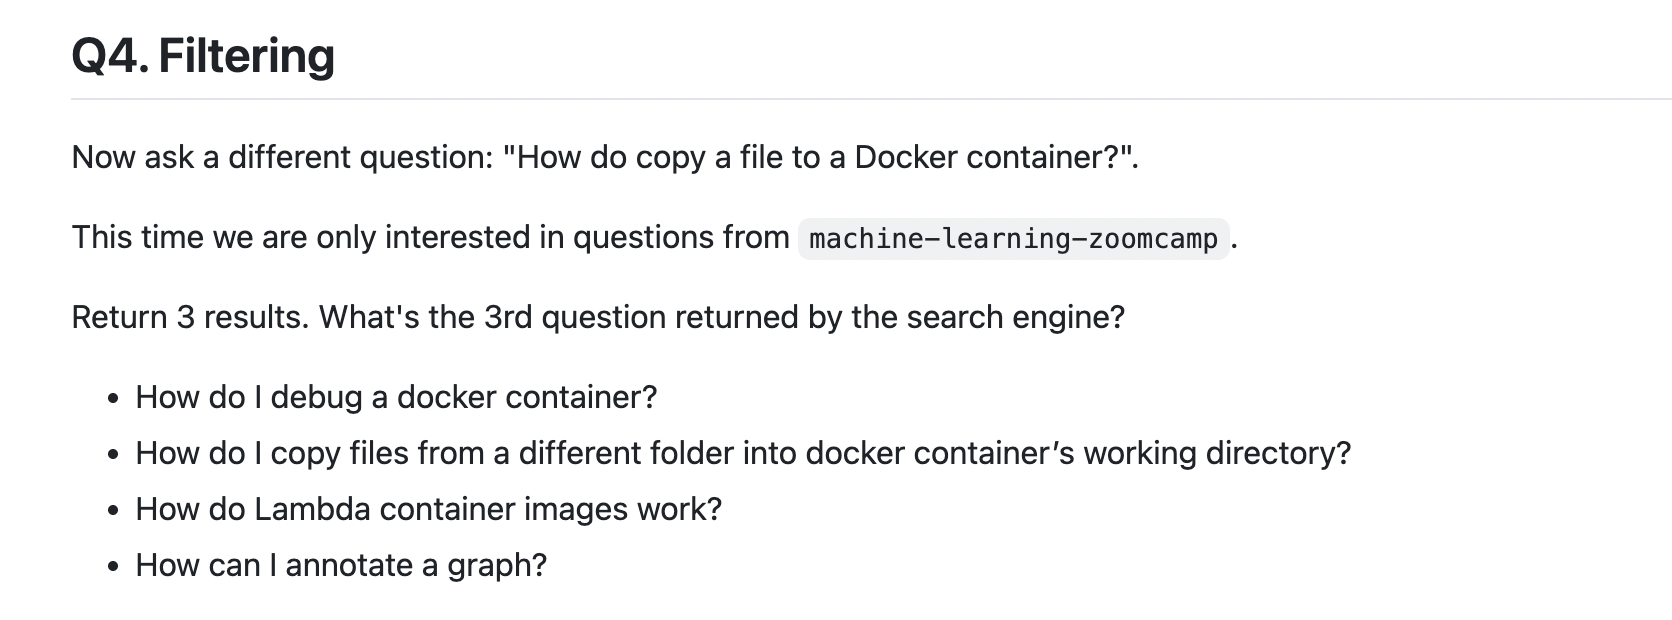

In [10]:
from elasticsearch import Elasticsearch

es_client = Elasticsearch("http://localhost:9200")


INDEX_NAME = "course-questions"
TEST_QUERY = "How do copy a file to a Docker container?"

search_query = {
            "size": 10,
            "query": {
                "bool": {
                    "must": {
                        "multi_match": {
                            "query": TEST_QUERY,
                            "fields": ["question^4", "text"],
                            "type": "best_fields"
                        }
                    },
                    "filter": {
                        "term": {
                            "course": "machine-learning-zoomcamp"
                        }
                    }
                }
            }
}
    
response = es_client.search(index=INDEX_NAME, body=search_query)
response.body["hits"]["hits"][2]["_source"]["question"]

'How do I copy files from a different folder into docker container’s working directory?'

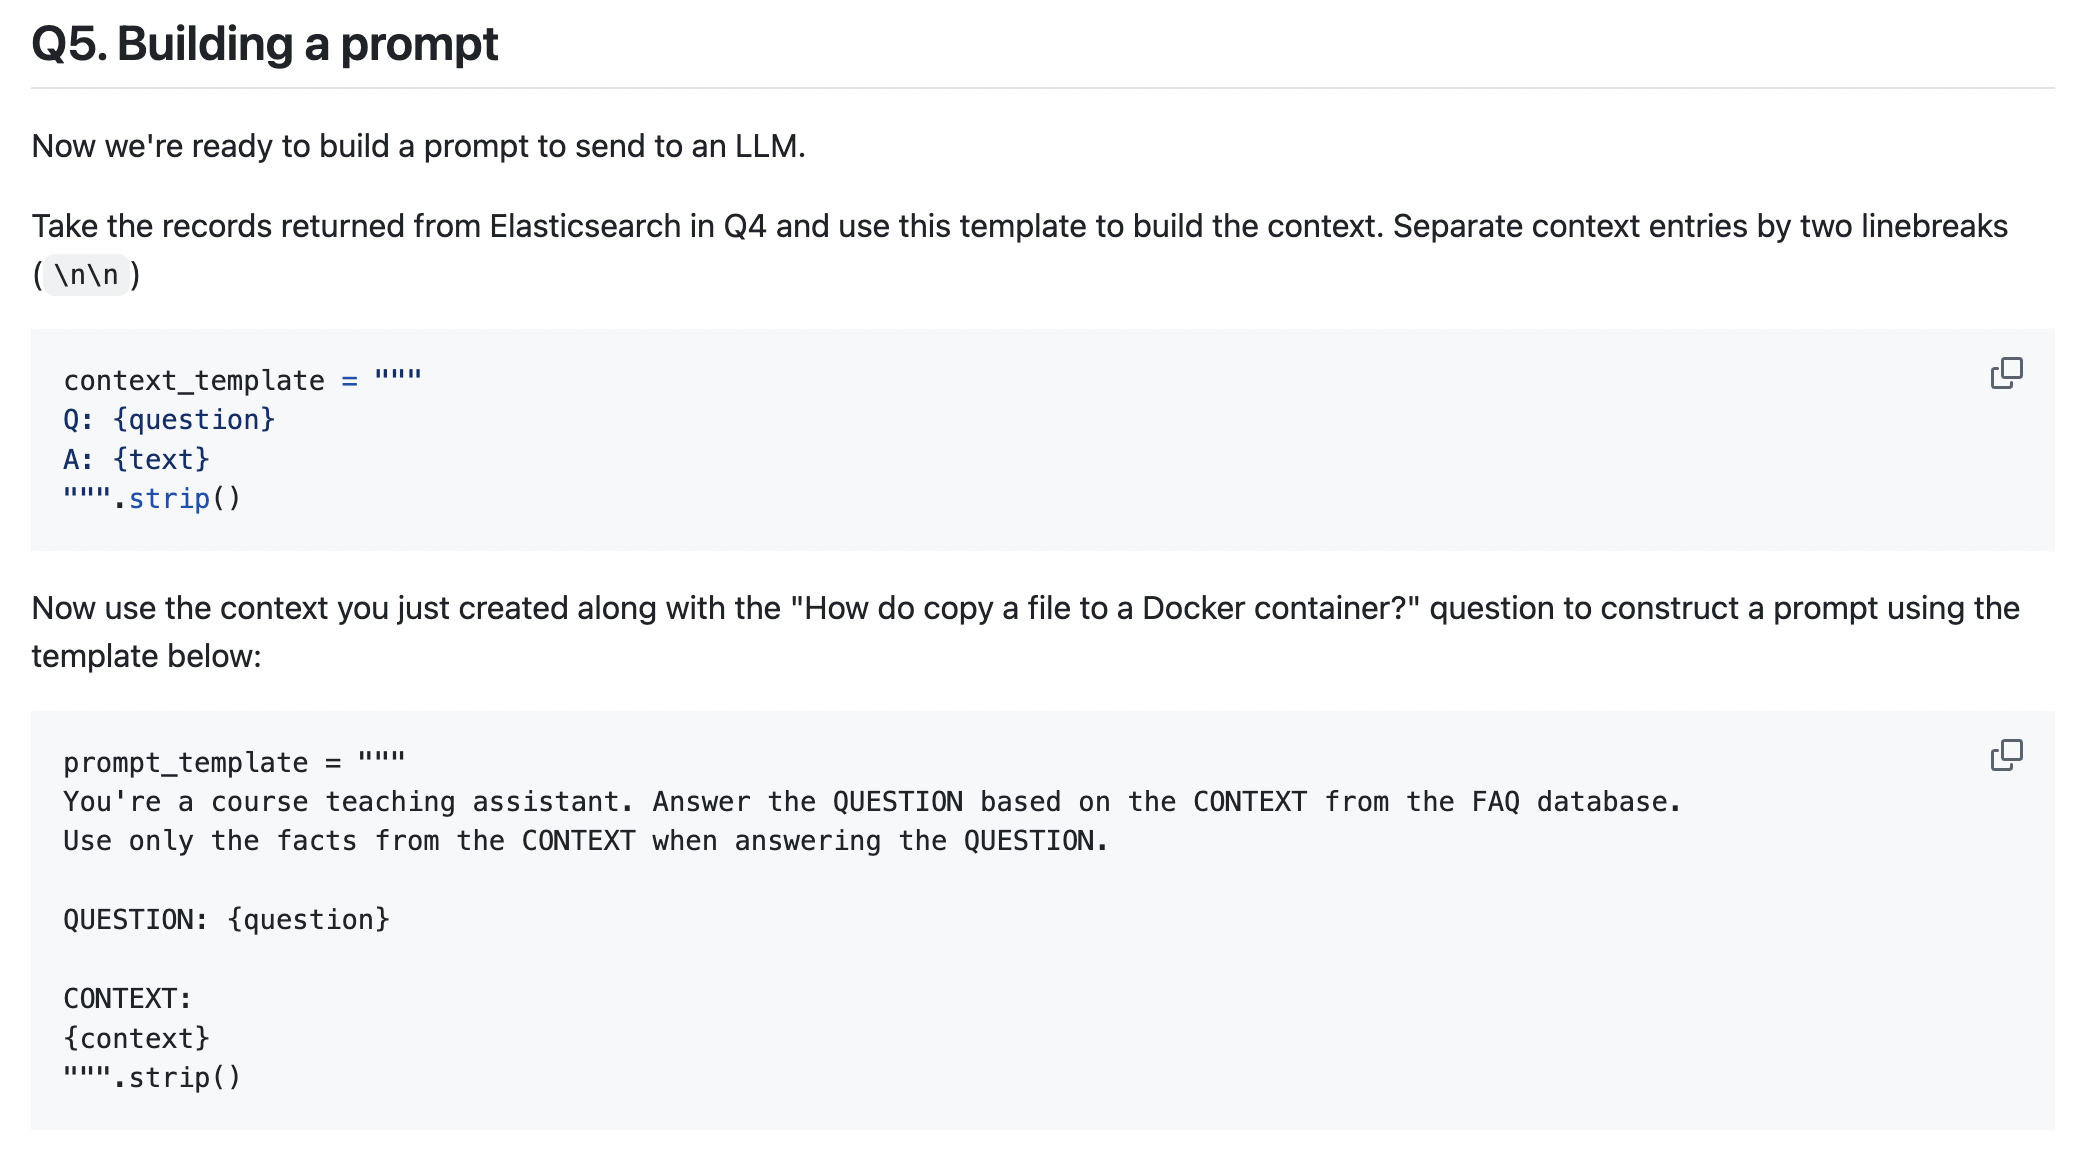

In [13]:
import tiktoken 

encoding = tiktoken.encoding_for_model("gpt-4o")
encoding.decode_single_token_bytes(63842)

b"You're"